In [13]:
import glob
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from pandas.plotting import table
from PIL import Image, ExifTags
import os

In [18]:
df_original = pd.read_csv("data_info_v4.csv", index_col=0)
df = pd.DataFrame(df_original)
df

,Unnamed: 0.1,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
0,0,V_pic/IMG_7960.jpg,IMG_7960.jpg,IMG_7960,IMG_7960.HEIC,000000.jpg,1,32.1,1,2,2,0,0,1,0,1,0,train
1,1,V_pic/IMG_7948.jpg,IMG_7948.jpg,IMG_7948,IMG_7948.HEIC,000001.jpg,1,32.6,1,1,0,0,0,0,0,1,0,train
2,2,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000002.jpg,0,8.8,1,2,2,0,0,0,0,1,0,train
3,3,V_pic/IMG_7747.jpg,IMG_7747.jpg,IMG_7747,IMG_7747.jpeg,000003.jpg,1,7.8,1,1,1,0,0,0,0,1,1,train
4,4,V_pic/IMG_7753.jpg,IMG_7753.jpg,IMG_7753,IMG_7753.jpeg,000004.jpg,0,12.2,1,2,0,0,0,0,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1065,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,001143.jpg,0,13.2,1,1,2,1,0,0,0,0,0,train
1144,1066,V_pic/IMG_7951.jpg,IMG_7951.jpg,IMG_7951,IMG_7951.HEIC,001144.jpg,0,9.2,1,2,2,0,0,0,0,1,0,train
1145,1067,V_pic/IMG_7945.jpg,IMG_7945.jpg,IMG_7945,IMG_7945.HEIC,001145.jpg,1,8.4,1,1,2,0,0,0,0,1,0,train
1146,1068,V_pic/IMG_7979.jpg,IMG_7979.jpg,IMG_7979,IMG_7979.HEIC,001146.jpg,0,32.1,1,0,0,0,0,0,0,1,0,train


##  matploblib

In [22]:
df_train = df.query('subset == \'train\'')
df_train

,Unnamed: 0.1,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
0,0,V_pic/IMG_7960.jpg,IMG_7960.jpg,IMG_7960,IMG_7960.HEIC,000000.jpg,1,32.1,1,2,2,0,0,1,0,1,0,train
1,1,V_pic/IMG_7948.jpg,IMG_7948.jpg,IMG_7948,IMG_7948.HEIC,000001.jpg,1,32.6,1,1,0,0,0,0,0,1,0,train
2,2,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000002.jpg,0,8.8,1,2,2,0,0,0,0,1,0,train
3,3,V_pic/IMG_7747.jpg,IMG_7747.jpg,IMG_7747,IMG_7747.jpeg,000003.jpg,1,7.8,1,1,1,0,0,0,0,1,1,train
4,4,V_pic/IMG_7753.jpg,IMG_7753.jpg,IMG_7753,IMG_7753.jpeg,000004.jpg,0,12.2,1,2,0,0,0,0,0,1,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,1065,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,001143.jpg,0,13.2,1,1,2,1,0,0,0,0,0,train
1144,1066,V_pic/IMG_7951.jpg,IMG_7951.jpg,IMG_7951,IMG_7951.HEIC,001144.jpg,0,9.2,1,2,2,0,0,0,0,1,0,train
1145,1067,V_pic/IMG_7945.jpg,IMG_7945.jpg,IMG_7945,IMG_7945.HEIC,001145.jpg,1,8.4,1,1,2,0,0,0,0,1,0,train
1146,1068,V_pic/IMG_7979.jpg,IMG_7979.jpg,IMG_7979,IMG_7979.HEIC,001146.jpg,0,32.1,1,0,0,0,0,0,0,1,0,train


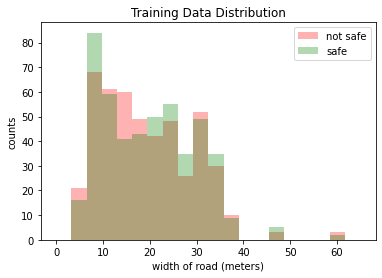

In [30]:
fig = plt.figure()
plt.hist(df_train.query("safe_to_walk == 0")["roadway_width"], numpy.linspace(0, 65, 21), alpha=0.3, facecolor="r", label="not safe")
plt.hist(df_train.query("safe_to_walk == 1")["roadway_width"], numpy.linspace(0, 65, 21), alpha=0.3, facecolor="g", label="safe")
plt.xlabel("width of road (meters)")
plt.ylabel("counts")

plt.title("Training Data Distribution")
plt.legend()
plt.savefig("training_data_stats.png")

In [25]:
df_val = df.query('subset == \'val\'')
df_val

,Unnamed: 0.1,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
16,16,V_pic/IMG_3870.jpg,IMG_3870.jpg,IMG_3870,IMG_3870.HEIC,000016.jpg,0,23.3,1,0,0,1,0,0,0,0,1,val
35,33,V_pic/IMG_3483.jpg,IMG_3483.jpg,IMG_3483,IMG_3483.HEIC,000035.jpg,1,34.5,1,1,1,0,0,0,0,1,0,val
38,36,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000038.jpg,1,5.8,1,2,1,0,0,0,0,1,0,val
70,64,V_pic/IMG_7977.jpg,IMG_7977.jpg,IMG_7977,IMG_7977.HEIC,000070.jpg,1,8.1,1,1,2,0,0,0,0,1,0,val
87,79,V_pic/IMG_3873.jpg,IMG_3873.jpg,IMG_3873,IMG_3873.HEIC,000087.jpg,0,22.6,1,1,2,1,0,0,0,0,1,val
97,89,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000097.jpg,0,9.9,1,2,0,0,0,0,0,1,0,val
132,121,V_pic/IMG_4066.jpg,IMG_4066.jpg,IMG_4066,IMG_4066.HEIC,000132.jpg,1,35.0,1,1,2,0,0,1,0,1,0,val
134,123,V_pic/IMG_4099.jpg,IMG_4099.jpg,IMG_4099,IMG_4099.HEIC,000134.jpg,0,30.0,1,1,1,0,1,0,0,0,0,val
193,178,V_pic/IMG_8088.jpg,IMG_8088.jpg,IMG_8088,IMG_8088.HEIC,000193.jpg,0,14.1,1,0,2,0,0,0,0,1,0,val
205,190,V_pic/IMG_3268.jpg,IMG_3268.jpg,IMG_3268,IMG_3268.HEIC,000205.jpg,0,31.9,1,1,2,1,0,0,0,0,0,val


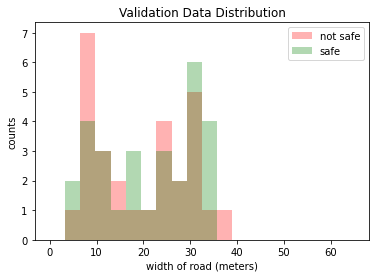

In [31]:
fig = plt.figure()
plt.hist(df_val.query("safe_to_walk == 0")["roadway_width"], numpy.linspace(0, 65, 21), alpha=0.3, facecolor="r", label="not safe")
plt.hist(df_val.query("safe_to_walk == 1")["roadway_width"], numpy.linspace(0, 65, 21), alpha=0.3, facecolor="g", label="safe")
plt.xlabel("width of road (meters)")
plt.ylabel("counts")

plt.title("Validation Data Distribution")
plt.legend()
plt.savefig("validation_data_stats.png")

In [26]:
df_test = df.query('subset == \'test\'')
df_test

,Unnamed: 0.1,path,filename,split_filename,original_filename,new_filename,safe_to_walk,roadway_width,crosswalk,crosswalk_signal,traffic_light,car,scooter,bike,other_obstacles,no_obstacle_in_crosswalk,weather,subset
33,31,V_pic/IMG_3327.jpg,IMG_3327.jpg,IMG_3327,IMG_3327.HEIC,000033.jpg,0,25.2,1,0,0,1,0,0,0,0,1,test
41,38,V_pic/IMG_8065.jpg,IMG_8065.jpg,IMG_8065,IMG_8065.HEIC,000041.jpg,0,34.3,1,0,0,1,0,0,0,0,0,test
94,86,V_pic/IMG_8067.jpg,IMG_8067.jpg,IMG_8067,IMG_8067.HEIC,000094.jpg,1,28.6,1,1,1,0,0,0,0,1,0,test
95,87,V_pic/IMG_20210610_130812.jpg,IMG_20210610_130812.jpg,IMG_20210610_130812,IMG_20210610_130812.jpg,000095.jpg,0,36.3,1,0,1,0,0,0,0,1,0,test
99,91,V_pic/o013ec39f7e3ed313e7085914aa1cee71_462069...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,o013ec39f7e3ed313e7085914aa1cee71_462069321854...,000099.jpg,0,10.4,1,2,2,0,0,0,0,1,0,test
113,104,V_pic/IMG_20210604_153551.jpg,IMG_20210604_153551.jpg,IMG_20210604_153551,IMG_20210604_153551.jpg,000113.jpg,0,31.2,1,0,0,0,0,0,0,1,1,test
115,106,V_pic/IMG_20210607_202541.jpg,IMG_20210607_202541.jpg,IMG_20210607_202541,IMG_20210607_202541.jpg,000115.jpg,0,18.5,1,0,2,0,0,0,0,1,2,test
119,110,V_pic/IMG_8072.jpg,IMG_8072.jpg,IMG_8072,IMG_8072.HEIC,000119.jpg,0,14.2,1,0,2,1,0,0,0,0,0,test
133,122,V_pic/IMG_20210608_153338.jpg,IMG_20210608_153338.jpg,IMG_20210608_153338,IMG_20210608_153338.jpg,000133.jpg,1,33.4,1,1,0,0,0,0,0,1,0,test
141,130,V_pic/IMG_7972.jpg,IMG_7972.jpg,IMG_7972,IMG_7972.HEIC,000141.jpg,1,4.9,1,1,2,0,0,0,0,1,0,test


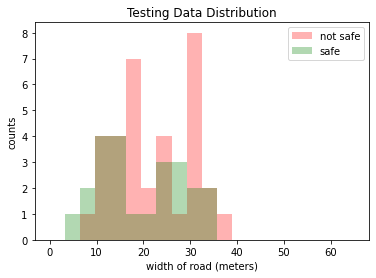

In [32]:
fig = plt.figure()
plt.hist(df_test.query("safe_to_walk == 0")["roadway_width"], numpy.linspace(0, 65, 21), alpha=0.3, facecolor="r", label="not safe")
plt.hist(df_test.query("safe_to_walk == 1")["roadway_width"], numpy.linspace(0, 65, 21), alpha=0.3, facecolor="g", label="safe")
plt.xlabel("width of road (meters)")
plt.ylabel("counts")

plt.title("Testing Data Distribution")
plt.legend()
plt.savefig("testing_data_stats.png")

,safetowalk,timetowalk
count,956.000000,956.000000
mean,0.505230,19.488128
std,0.500234,9.863976
min,0.000000,4.400000
25%,0.000000,11.000000
50%,1.000000,18.500000
75%,1.000000,26.500000
max,1.000000,59.100000


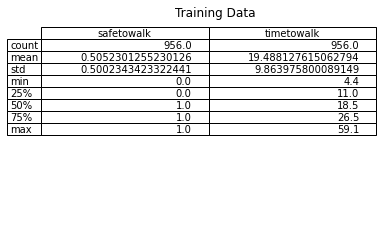

In [25]:
training_desc = df_train.describe()

#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, training_desc, loc='upper right')

plt.title("Training Data")

#save the plot as a png file
plt.savefig('training_desc.png')

df_train.describe()

,safetowalk,timetowalk
count,57.000000,57.000000
mean,0.508772,20.256140
std,0.504367,10.289992
min,0.000000,5.400000
25%,0.000000,9.900000
50%,1.000000,22.600000
75%,1.000000,31.200000
max,1.000000,36.300000


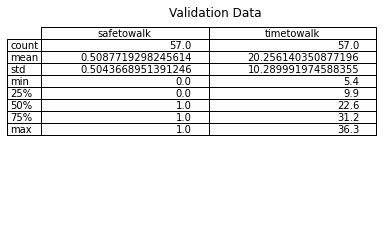

In [26]:
val_desc = df_val.describe()

#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, val_desc, loc='upper right')

plt.title("Validation Data")

#save the plot as a png file
plt.savefig('validation_desc.png')

df_val.describe()

,safetowalk,timetowalk
count,57.000000,57.000000
mean,0.403509,21.166667
std,0.494962,8.542903
min,0.000000,4.900000
25%,0.000000,14.300000
50%,0.000000,20.000000
75%,1.000000,29.800000
max,1.000000,36.300000


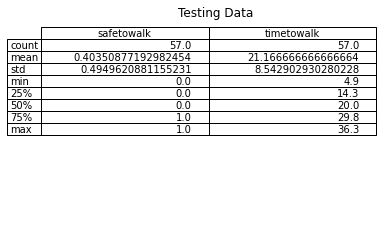

In [27]:
testing_desc = df_test.describe()

#create a subplot without frame
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, testing_desc, loc='upper right')

plt.title("Testing Data")

#save the plot as a png file
plt.savefig('testing_desc.png')

df_test.describe()